**In this project, I used two approaches to analyze and visualize the synthetic data generated for clustering.**

# Approach 1. K-Means Clustering with TensorFlow (Custom Implementation)
This approach uses a custom implementation of the K-Means algorithm using TensorFlow operations. It provides a low-level understanding of the clustering process and allows for fine-tuning of the algorithm.

In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, adjusted_rand_score

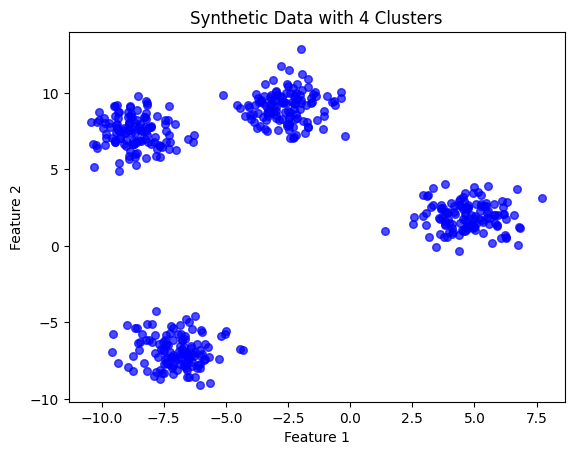

In [7]:
# Generate synthetic data
X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)
X = tf.constant(X, dtype=tf.float32)

# Plot original data
plt.scatter(X[:, 0], X[:, 1], c='b', marker='o', s=30, alpha=0.7)
plt.title('Synthetic Data with 4 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [8]:
# Define KMeans function
def kmeans(X, k, max_iterations=100):
    centroids = tf.random.shuffle(X)[:k]

    for _ in range(max_iterations):
        distances = tf.reduce_sum(tf.square(tf.expand_dims(X, 1) - centroids), axis=2)
        assignments = tf.argmin(distances, axis=1)

        new_centroids = []
        for i in range(k):
            mask = tf.equal(assignments, i)
            new_centroid = tf.reduce_mean(tf.boolean_mask(X, mask), axis=0)
            new_centroids.append(new_centroid)

        centroids = tf.stack(new_centroids)

    return assignments, centroids


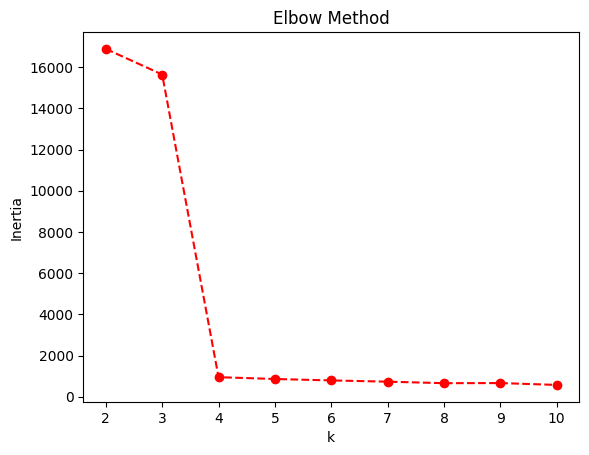

In [9]:
# Elbow method
inertia = []
for k in range(2, 11):
    assignments, centroids = kmeans(X, k)
    distances = tf.reduce_sum(tf.square(tf.expand_dims(X, 1) - centroids), axis=2)
    inertia.append(tf.reduce_sum(tf.reduce_min(distances, axis=1)).numpy())

plt.plot(range(2, 11), inertia, 'ro--')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


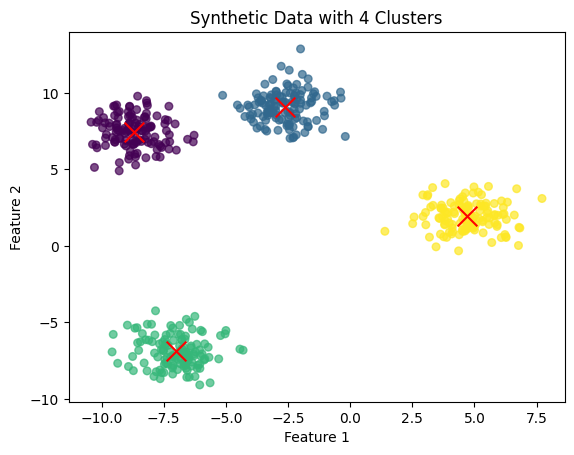

In [10]:
# Optimal k
k_optimal = 4
assignments, centroids = kmeans(X, k_optimal)

# Plot clustered data
plt.scatter(X[:, 0], X[:, 1], c=assignments.numpy(), marker='o', s=30, alpha=0.7, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='x')
plt.title('Synthetic Data with 4 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [11]:
# Calculate metrics
labels = assignments.numpy()
sil_score = silhouette_score(X.numpy(), labels)
print(f"Silhouette score in k={k_optimal}: {sil_score:.4f}")

ari_score = adjusted_rand_score(y, labels)
print(f"Adjusted Rand score in k={k_optimal}: {ari_score:.4f}")

Silhouette score in k=4: 0.7911
Adjusted Rand score in k=4: 1.0000


# Approach 2. K-Means Clustering with TensorFlow (Built-in Estimator)
This approach utilizes TensorFlow's built-in KMeans estimator to perform clustering on the synthetic data. It leverages TensorFlow's optimized implementation for potentially better performance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.compat.v1.estimator.experimental import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

import warnings
warnings.filterwarnings('ignore')


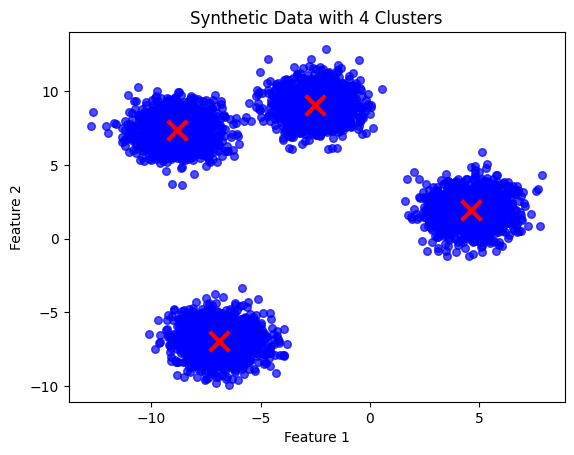

In [2]:
# Generate synthetic data using make_blobs
X, y = make_blobs(n_samples=5000, centers=4, cluster_std=1.0, random_state=42)
X = X.astype(np.float32)
# Calculate cluster centers
unique_labels = np.unique(y)
centers = np.array([X[y == label].mean(axis=0) for label in unique_labels])

# Scatter plot of the generated data
plt.scatter(X[:, 0], X[:, 1], c='b', marker='o', s=30, alpha=0.7)
# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('Synthetic Data with 4 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions

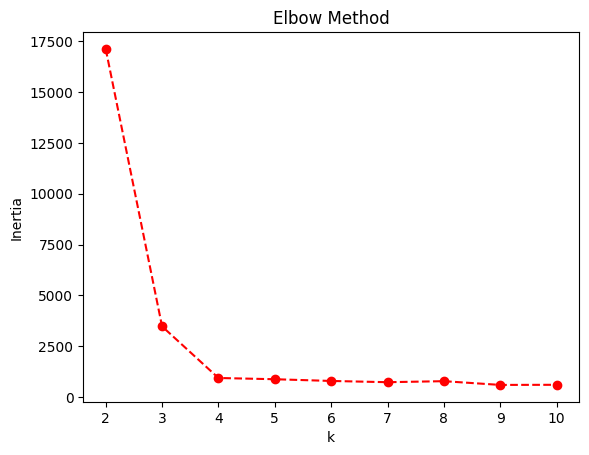

In [3]:
# Elbow method to find the optimal number of clusters
inertia = []
for k in range(2, 11):
    kmeans = KMeans(num_clusters=k, use_mini_batch=False)
    input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
        {"x": X}, batch_size=500, num_epochs=1, shuffle=False
    )
    kmeans.train(input_fn)
    # Total inertia (sum of squared distances to centroids)
    inertia.append(kmeans.score(input_fn))

# Plotting the elbow method
plt.plot(range(2, 11), inertia, 'ro--')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [4]:
# Optimal number of clusters
k_optimal = 4
kmeans = KMeans(num_clusters=k_optimal, use_mini_batch=False)
input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    {"x": X}, batch_size=500, num_epochs=1, shuffle=False
)
kmeans.train(input_fn)

# Get the cluster centers and predicted labels
cluster_centers = kmeans.cluster_centers()
cluster_indices = list(kmeans.predict_cluster_index(input_fn))
labels = np.array(cluster_indices)

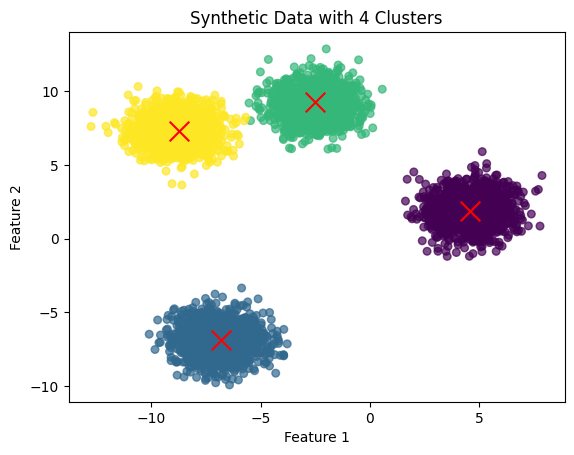

Silhouette score for k=4:  0.78932333
Adjusted Rand Index score for k=4:  0.9989335466666667


In [5]:
# Plot the clustered data with cluster centers
plt.scatter(X[:, 0], X[:, 1], c=labels, marker='o', s=30, alpha=0.7, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', marker='x')
plt.title('Synthetic Data with 4 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Calculate silhouette score and adjusted Rand index
sil_score = silhouette_score(X, labels)
print("Silhouette score for k=4: ", sil_score)

ari_score = adjusted_rand_score(y, labels)
print("Adjusted Rand Index score for k=4: ", ari_score)

# Approach 3. K-Means Clustering with Scikit-Learn
This approach uses Scikit-Learn's KMeans implementation, providing a straightforward and widely-used method for comparison.

In [12]:
# import packages
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

import warnings
warnings.filterwarnings('ignore')

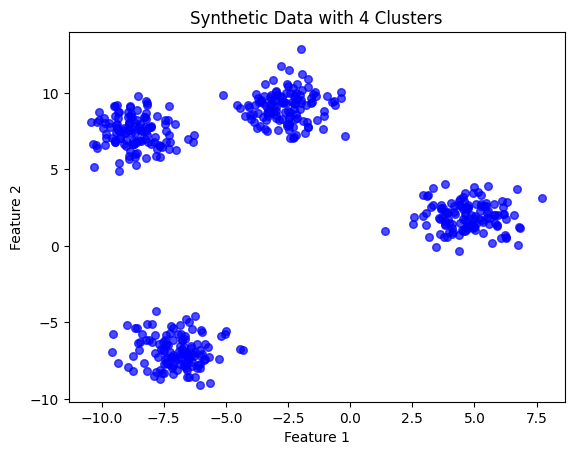

In [13]:
X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c='b', marker='o', s=30, alpha=0.7)
plt.title('Synthetic Data with 4 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

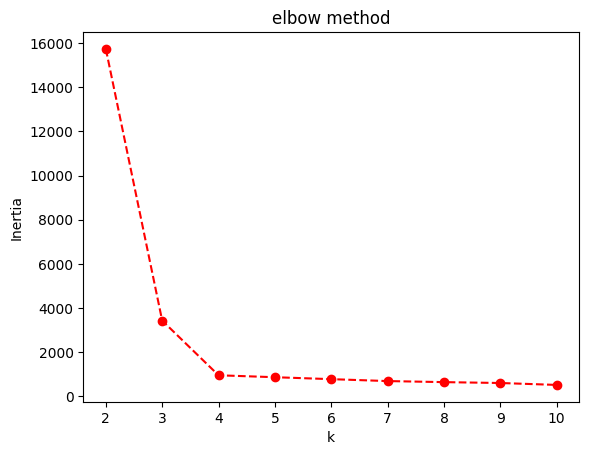

In [14]:
inertia = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  inertia.append(kmeans.fit(X).inertia_)

plt.plot(range(2, 11), inertia, 'ro--')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('elbow method')
plt.show()

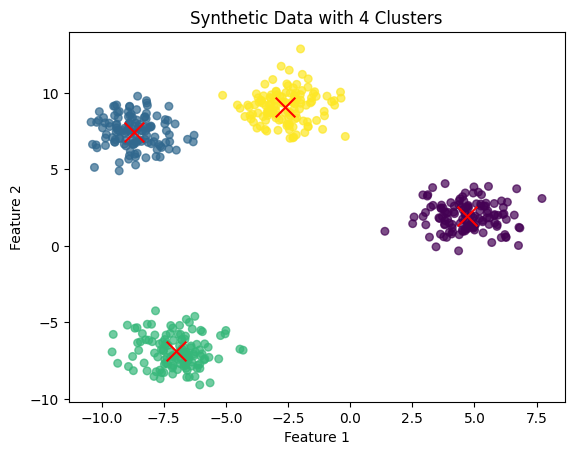

In [15]:
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit_transform(X)
labels = kmeans.labels_


plt.scatter(X[:, 0], X[:, 1], c=labels, marker='o', s=30, alpha=0.7, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x')
plt.title('Synthetic Data with 4 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [16]:
sil_score = silhouette_score(X, labels)
print("Silhouette score in k=4: ", sil_score)

ari_score = adjusted_rand_score(y, labels)
print("Adjusted Rand score in k=5: ", ari_score)

Silhouette score in k=4:  0.7911042588289479
Adjusted Rand score in k=5:  1.0
